In [4]:
import numpy as np 
import matplotlib.pyplot as plt 
import math 
from scipy.optimize import curve_fit

First Experiment (Plateau) 

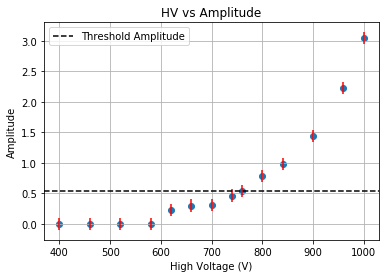

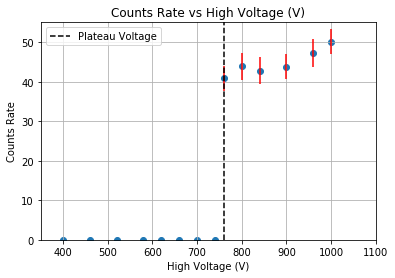

In [5]:
#put all needed items in arrays
HV = np.array([400,460,520,580,620,660,700,740,760,800,840,900,960,1000])
amplitude = np.array([0,0,0,0,0.22,0.3,0.304,0.464,0.544,0.784,0.976,1.44,2.22,3.04])
counts = np.array([0,0,0,0,0,0,0,0,612,659,642,700,708,953])
time = np.array([1,1,1,1,1,1,1,1,15,15,15,16,15,19])
count_rate = counts/time


#make plot
plt.figure(1)
plt.scatter(HV,amplitude)
plt.grid(True)
plt.ylabel("Amplitude")
plt.xlabel("High Voltage (V)")
plt.title("HV vs Amplitude")
plt.axhline(0.544,linestyle='--',label="Threshold Amplitude",color="black")
plt.legend()
for n in range(len(HV)):
    plt.errorbar(HV[n],amplitude[n],0.1,ecolor="red")

#calculate error for count rate vs HV
sigma_t = 1
sigma_counts = np.sqrt(counts)
sigma_counts_rate = np.sqrt((sigma_counts[8:]**2 / (time[8:]**2)) + (counts[8:]**2 / time[8:]**4))

#count rate vs HV
plt.figure(2)
plt.scatter(HV,count_rate)
plt.ylim(0,55)
plt.xlim(350,1100)
plt.grid(True)
plt.title("Counts Rate vs High Voltage (V)")
plt.ylabel("Counts Rate")
plt.xlabel("High Voltage (V)")
plt.axvline(x=760,linestyle='--',label='Plateau Voltage',color="black")
plt.legend()
for n in range(len(HV[8:15])): 
    plt.errorbar(HV[8:15][n],count_rate[8:15][n],sigma_counts_rate[n],ecolor="red")

Experiment 2 (Determining C, R, and Q)

In [3]:
#done in notebook

Experiment 3 (Counting Statistic)

17
The reduced chi sqaure is 1.1901721291045295


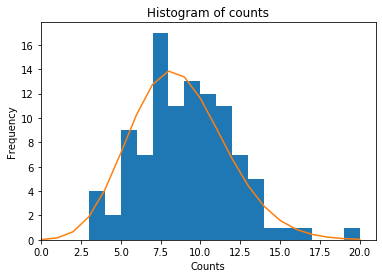

In [3]:
#put all the counts into an array
counts_exp3 = np.array([6,6,10,9,11,13,11,16,7,9,8,7,7,5,12,5,9,5,11,11,12,8,7,6,10,13,20,4,12,10,7,7,11,13,12,8,7,6,10,7,8,10,13,8,7,9,3,5,3,12,15,12,11,10,7,9,10,9,8,11,10,11,3,9,3,
7,9,6,8,6,5,13,7,9,7,14,9,10,9,10,7,10,4,8,9,12,11,5,10,7,5,6,7,8,9,8,5,11,7,5,8,11])

#plot the array as a histogram
plt.figure(3)
bin_num = max(counts_exp3) - min(counts_exp3)
print(bin_num)
plt.hist(counts_exp3,bins=bin_num)
plt.xlim(0,21)
plt.ylabel("Frequency")
plt.xlabel("Counts")
plt.title("Histogram of counts")

#Poisson fits
mean = np.mean(counts_exp3)
hist = np.histogram(counts_exp3,bins=bin_num)
val = np.arange(0,21)
poisson_dist = []
for n in range(len(val)):
    probability = (102 * np.exp(-mean) * mean**val[n])/math.factorial(val[n])
    poisson_dist.append(probability)

#plot poisson
plt.figure(3)
poisson_x = val
plt.plot(val,poisson_dist)

#calculating chi fit
frequency_per_unit = hist[0]
unique_val = hist[1][0:-1]
chi_poisson_dist = []
for n in range(len(unique_val)):
    probability = (102 * np.exp(-mean) * mean**unique_val[n])/math.factorial(unique_val[n])
    chi_poisson_dist.append(probability)

chi_sqrt = sum(((frequency_per_unit-chi_poisson_dist)**2)/chi_poisson_dist)
print("The reduced chi sqaure is " + str(chi_sqrt/15))

Experiment 4 (Dead Time)

In [5]:
#Done on notebook

Experiment 5

mu/rho = 0.10628120890043324 + 0.00532389335734459 cm^2/g
Background Radiation = 0.39828213112443 + 0.013989706521384131
A = 4.168737756905983 + 0.25797545966885493
The reduce chi squared is 2.024115434011651
Interpolated value is : 0.1073
The background radiation is 0.3951317105701901
Z-Score of mu/rho is 0.19136204112001734
Corresponding p-value of mu/rho is 0.84824
Z-Score of background radiation is :0.17408993536046857
Corresponding p-value of background radiation is 0.86179


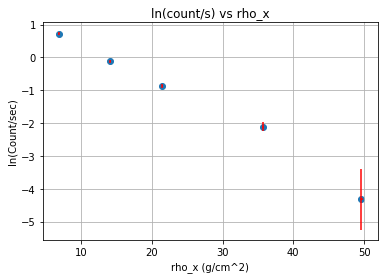

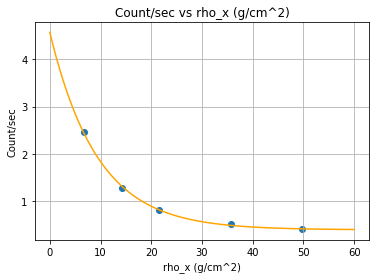

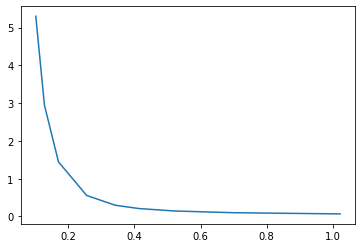

In [8]:
#enter all needed variables w(cm),h(cm),m(g)
#sheet 1
w_1 = 10.085 
h_1 = 9.989
m_1 = 680
area_1 = h_1 * h_1
rho_x_1 = m_1/area_1

#sheet 2
w_2 = 10.175
h_2 = 10.278
m_2 = 776
area_2 = h_2 * h_2
rho_x_2 = m_2/area_2

#sheet 3 
w_3 = 10.304
h_3 = 10.352
m_3 = 784
area_3 = h_3 * h_3
rho_x_3 = m_3/area_3

#sheet 4 
w_4 = 10.22
h_4 = 10.214
m_4 = 1487
area_4 = h_4 * h_4
rho_x_4 = m_4/area_4

#sheet 5 
w_5 = 10.279
h_5 = 10.382
m_5 = 1498
area_5 = h_5*h_5 
rho_x_5 = m_5/area_5

#thickness of individual sheet
h = np.array([h_1,h_2,h_3,h_4,h_5])
w = np.array([w_1,w_2,w_3,w_4,w_5])
area = np.array([area_1,area_2,area_3,area_4,area_5])
m = np.array([m_1,m_2,m_3,m_4,m_5])
thickness = np.array([rho_x_1,rho_x_2,rho_x_3,rho_x_4,rho_x_5])
rho_x = np.cumsum(thickness) #x on linearize graph and Euler scale 

#sigma of rho x 
sigma_l = 0.05
sigma_w = 0.05
sigma_mass = 1
sigma_area = np.sqrt(sigma_w**2*h**2 + sigma_l**2*w**2)
sigma_thickness = np.sqrt(sigma_mass**2/area**2 + sigma_area**2*m**2/area**4) 
sigma_rx_1 = sigma_thickness[0]
sigma_rx_2 = np.sqrt(sigma_rx_1**2 + sigma_thickness[1]**2)
sigma_rx_3 = np.sqrt(sigma_rx_2**2 + sigma_thickness[2]**2)
sigma_rx_4 = np.sqrt(sigma_rx_3**2 + sigma_thickness[3]**2)
sigma_rx_5 = np.sqrt(sigma_rx_4**2 + sigma_thickness[4]**2)
sigma_rho_x = np.array([sigma_rx_1,sigma_rx_2,sigma_rx_3,sigma_rx_4,sigma_rx_5]) #error for the x-axis

#counts 
counts_main = np.array([1022,1002,1010,1010,1069])

#time
time_main = np.array([415,777,1233,1958,2617])

#intensity I 
intensity_main = counts_main/time_main #y on Euler scale 
#ln of intensity
ln_of_intensity = np.log(intensity_main)

#background radiation
background_count = 1185
background_time = 2999
background_intensity = background_count/background_time 
sigma_background_intensity = np.sqrt(np.sqrt(1185)**2/2999**2 + 1*1185**2/2999**4)

#intensity subtract background 
intensity_main_no_back = intensity_main - background_intensity 
ln_intensity_no_back = np.log(intensity_main_no_back) #y on the lienarized graph
#sigma of ln of intensity
sigma_time_main = 1
sigma_count_main = np.sqrt(counts_main)
sigma_intensity = np.sqrt(sigma_count_main**2/time_main**2 + sigma_time_main**2*counts_main**2/time_main**4)
sigma_intensity_ln = sigma_intensity/intensity_main_no_back #y error

#linearized plot 
plt.figure(4)
plt.scatter(rho_x,ln_intensity_no_back,)
for n in range(len(rho_x)):
    plt.errorbar(rho_x[n],ln_intensity_no_back[n],sigma_intensity_ln[n],sigma_rho_x[n],color="red")
plt.grid(True)
plt.xlabel("rho_x (g/cm^2)")
plt.ylabel("ln(Count/sec)")
plt.title("ln(count/s) vs rho_x")
#error on the axis too small to see

#Graph on Euler scale 
#Error is too small to see
plt.figure(5)
plt.scatter(rho_x,intensity_main)
plt.grid(True)
plt.title("Count/sec vs rho_x (g/cm^2)")
plt.xlabel("rho_x (g/cm^2)")
plt.ylabel("Count/sec")

#Best fit of Euler scale
#Euler model
def euler_model(x,u,A,B):
    return A*np.exp(-u*x) + B

#initial guesses for the parameter
u0 = 0.1
A0 = 4
B0 = 0.3

#performing the curve fit
popt,pcov = curve_fit(euler_model,rho_x,intensity_main,p0=[u0,A0,B0],sigma=sigma_intensity,absolute_sigma=True)
u,A,B = popt
du,dA,dB = np.sqrt(np.diag(pcov))
print("mu/rho = "+str(u) + " + " + str(du) + " cm^2/g")
print("Background Radiation = "+str(B) + " + " + str(dB))
print("A = "+str(A) + " + " + str(dA))

#plot the Euler fit
plt.figure(5)
e_domain = np.linspace(0,60,10000)
plt.plot(e_domain,euler_model(e_domain,u,A,B),color="orange")

#perform chi square
residual =intensity_main - euler_model(rho_x,u,A,B)
chi_square = ((residual / sigma_intensity)**2).sum()
reduce_chi_square = chi_square / float(intensity_main.size-3)
print("The reduce chi squared is " + str(reduce_chi_square))

#Morning: interpolate, p-value for both u and B and we done

#interpolation
E = np.linspace(0.1022,1.022,100000)
E_list = np.array([0.1022,0.1277,0.1703,0.2554,0.3405,0.4086,0.5108,0.6811,1.022])
u_rho_list = np.array([5.3,2.97,1.45,0.558,0.300,0.214,0.149,0.102,0.0682])
u_rho = np.interp(E,E_list,u_rho_list)
plt.figure(6)
plt.plot(E,u_rho)

interpolation_val = 0.1073 #taken from lecture
print("Interpolated value is : " + str(interpolation_val))
print("The background radiation is " +str(background_intensity))

#Z-score of u (mu/rho)
z_score_u = abs(u-interpolation_val)/(du)
print("Z-Score of mu/rho is " + str(z_score_u))
print("Corresponding p-value of mu/rho is " + str(0.84824))

#Z-Score of B (background radiation)
z_score_B = abs(B - background_intensity) / np.sqrt(dB**2 + sigma_background_intensity**2)
print("Z-Score of background radiation is :" + str(z_score_B))
print("Corresponding p-value of background radiation is " + str(0.86179))

[-3.62340426  1.05068723]


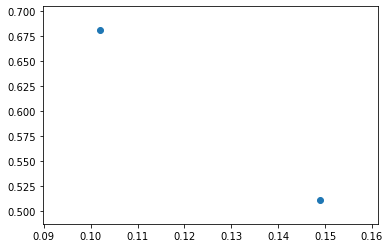

In [6]:
#interpolation attempt 
plt.figure(7)
x_r = np.array([0.102,0.149])
y_E = np.array([0.6811,0.5108])
plt.scatter(x_r,y_E)
slope = np.polyfit(x_r,y_E,1)
print(slope)
